# PROJET MMI 
### Jean Guyomarc'h & Etienne Bozec & Maxence Jamme

## Analyse du PCM - DPCM - Partie 1

### 1.1.a - Création d'un signal quantifier à 8bits/ech:

Premièrement, on crée une tonalité sinusoïdale de fréquence f=2kHz, d'une durée de 3 secondes, en calculant 10 échantillons par période.

In [ ]:
#implémentation des libs
import numpy as np
import matplotlib.pyplot as plt
from scipy.io.wavfile import write
import pyaudio
import time

# Fonction pour lire le signal avec PyAudio
def play_sound(signal, fs):
    p = pyaudio.PyAudio()
    stream = p.open(format=pyaudio.paInt16,
                    channels=1,
                    rate=fs,
                    output=True)
    stream.write(signal)
    stream.stop_stream()
    stream.close()
    p.terminate()    

# Fonction pour enregistrer le signal au format WAV
def save_wav(filename, signal, fs):
    write(filename, fs, signal)

# Paramètres de création du signal
f = 2000  # fréquence de la tonalité (Hz)
duree = 3  # durée du signal (s)
ech_periode = 10  # échantillons par période
fs = f * ech_periode  # fréquence d'échantillonnage

# Création du signal
t = np.linspace(0, duree, int(fs * duree), endpoint=False)
signal = np.sin(2 * np.pi * f * t)

# Convertir le signal en format audible
signal_int16 = np.int16((signal + 1) * 32767 / 2)

# Visualisation - Affichage limité à 3 périodes
periode = 1 / f

plt.figure()
plt.plot(t, signal, label='Original')

plt.xlim(0, 3 * periode)  # Limiter l'axe des x à 3 périodes
plt.legend()
plt.xlabel('Temps (s)')
plt.ylabel('Amplitude')
plt.title(f'Signal normal')
plt.show()

# Enregistrer le signal au format WAV
save_wav('signal_1.wav', signal_int16, fs)

Le programme vient de créer un fichier audio nommé signal_1.wav. Ce signal est donc notre signal de référence.

Ensuite, on quantifie ce signal à 8 bits par échantillon.

In [ ]:
# Fonction pour quantifier le signal
def quantifier(signal, bits):
    signal_min = np.min(signal)
    signal_max = np.max(signal)
    q = (signal_max - signal_min) / (2**bits - 1)
    return np.round((signal - signal_min) / q) * q + signal_min

# Paramètres de création du signal
f = 2000  # fréquence de la tonalité (Hz)
duree = 3  # durée du signal (s)
ech_periode = 10  # échantillons par période
fs = f * ech_periode  # fréquence d'échantillonnage

# Création du signal
t = np.linspace(0, duree, int(fs * duree), endpoint=False)
signal = np.sin(2 * np.pi * f * t)

#Nombre de bits/éch.
bits = 8

signal_quantifie_8 = quantifier(signal, bits)
signal_quantifie_int16 = np.int16((signal_quantifie_8 + 1) * 32767 / 2)

# Visualisation - Affichage limité à 3 périodes
periode = 1 / f
plt.figure()
plt.plot(t, signal, label='Original')
plt.plot(t, signal_quantifie_8, label=f'Quantifié à {bits} bits')
plt.xlim(0, 2 * periode)  # Limiter l'axe des x à 3 périodes
plt.legend()
plt.xlabel('Temps (s)')
plt.ylabel('Amplitude')
plt.title(f'Quantification à {bits} bits')
plt.show()

# Sauvegarder le signal quantifié
write(f'signal_quantifie_{bits}bits.wav', fs, signal_quantifie_int16)

Le programme vient de créer un fichier audio nommé signal_quantifie_8bits.wav.

On constate aucune différence lorsqu'on joue les deux sons.
On constate aussi aucune diféérence entre si on trace les deux signaux.
On peux en déduire alors qu'il est très difficile de distinguer ces signaux.

Les deux sons et signaux présentent aucune distinction audible ni visuelle lors de la comparaison, indiquant que l'augmentation du nombre de bits par échantillon au-delà de 8 bits ne semble pas apporter d'amélioration significative à la qualité sonore. 

### 1.1.b - Création d'un signal quantifier à 6, 4, 3, 2 bits/ech:

On crée des signaux quantifiés à 6, 4, 3, 2 bits par échantillon.

In [ ]:
# Paramètres de création du signal
f = 2000  # fréquence de la tonalité (Hz)
duree = 3  # durée du signal (s)
ech_periode = 10  # échantillons par période
fs = f * ech_periode  # fréquence d'échantillonnage

# Création du signal
t = np.linspace(0, duree, int(fs * duree), endpoint=False)
signal = np.sin(2 * np.pi * f * t)

for bits in [6, 4, 3, 2]:
    signal_quantifie = quantifier(signal, bits)
    signal_quantifie_int16 = np.int16((signal_quantifie + 1) * 32767 / 2)    
    
    # Visualisation - Affichage limité à 3 périodes
    periode = 1 / f
    plt.figure()
    plt.plot(t, signal, label='Original')
    plt.plot(t, signal_quantifie, label=f'Quantifié à {bits} bits')
    plt.xlim(0, 2 * periode)  # Limiter l'axe des x à 3 périodes
    plt.legend()
    plt.xlabel('Temps (s)')
    plt.ylabel('Amplitude')
    plt.title(f'Quantification à {bits} bits')
    plt.show()
    
    # Sauvegarder le signal quantifié
    write(f'signal_quantifie_{bits}bits.wav', fs, signal_quantifie_int16)
    
    # Pause entre les lectures
    time.sleep(1)

Le programme vient de créer les fichiers audio suivants: 
- signal_quantifie_6bits.wav
- signal_quantifie_4bits.wav
- signal_quantifie_3bits.wav
- signal_quantifie_2bits.wav

Comme on peut le constater, les deux signaux sont identique jusqu'a 4bits/éch pour le graphique. Et pour l'oreille humaine, identique jusqu'a 2 bits/éch ou on entends un différence.
On déduit alors qu'il y a aucune différence entre 8, 6, 4, 3 bits/échantillonage

Les deux signaux demeurent identiques visuellement jusqu'à une résolution de 4 bits par échantillon sur le graphique, et sont presque indiscernables à l'oreille jusqu'à 2 bits par échantillon, où une différence devient audible. Ainsi, il est clair qu'il n'y a aucune distinction notable entre les résolutions de 8, 6, 4, et 3 bits par échantillonage.

### 1.c - Création d'un signal quantifier à 1 bits/ech:

On crée un signal quantifié à 1 bits par échantillon.

In [ ]:
# Paramètres de création du signal
f = 2000  # fréquence de la tonalité (Hz)
duree = 3  # durée du signal (s)
ech_periode = 10  # échantillons par période
fs = f * ech_periode  # fréquence d'échantillonnage

# Création du signal
t = np.linspace(0, duree, int(fs * duree), endpoint=False)
signal = np.sin(2 * np.pi * f * t)

#Nombre de bits/éch.
bits = 1

signal_quantifie = quantifier(signal, bits)
signal_quantifie_int16 = np.int16((signal_quantifie + 1) * 32767 / 2)

# Visualisation - Affichage limité à 3 périodes
periode = 1 / f
plt.figure()
plt.plot(t, signal, label='Original')
plt.plot(t, signal_quantifie, label=f'Quantifié à {bits} bits')
plt.xlim(0, 2 * periode)  # Limiter l'axe des x à 3 périodes
plt.legend()
plt.xlabel('Temps (s)')
plt.ylabel('Amplitude')
plt.title(f'Quantification à {bits} bits')
plt.show()

# Sauvegarder le signal quantifié
write(f'signal_quantifie_{bits}bits.wav', fs, signal_quantifie_int16)


Le programme vient de créer un fichier audio nommé signal_quantifie_1bits.wav.

La quantification d'un signal avec un seul bit par échantillon produit une approximation grossière de l'original sous forme d'onde carrée, entraînant une perte significative de détails, un bruit de quantification élevé, et une forme d'onde qui ressemble visuellement à une séquence de valeurs binaires alternantes plutôt qu'à la sinusoïde d'origine.

### 1.2 Création de paquets de 2 octets et simulation de retard

Pour cette partie, nous allons simuler un retard lors de la transmission de paquets d'octets à partir du signal échantillonné à 8 bits.

On simule l'envoie de ces paquets sur un réseau IP, pour cela, nous allons limité le retard max à 100 µs.

Nombre de retards : 279


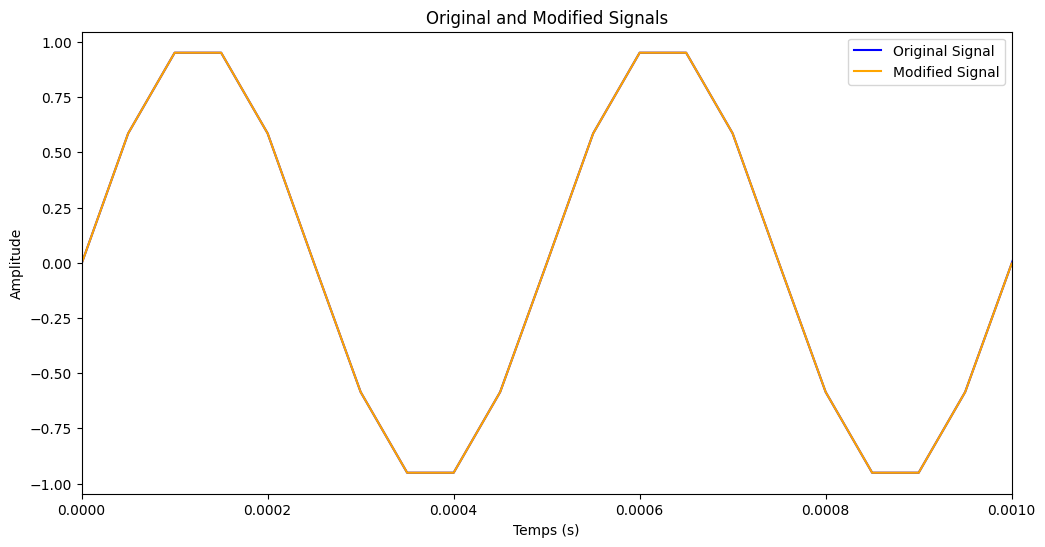

In [36]:
import numpy as np
import pyaudio
import time
from scipy.io.wavfile import read, write
import matplotlib.pyplot as plt

# Fonction pour quantifier le signal
def quantifier(signal, bits):
    signal_min = np.min(signal)
    signal_max = np.max(signal)
    q = (signal_max - signal_min) / (2**bits - 1)
    return np.round((signal - signal_min) / q) * q + signal_min

def create_modified_signal(signal, fs, taille_paquet, probabilite_latence, latence):
    nb = 0
    signal_paquet = np.array([])
    #temps_modifies = np.arange(len(signal)) / fs  # Créez une copie de votre tableau de temps
    
    for i in range(0, len(signal), taille_paquet):
        if np.random.rand() < probabilite_latence:
            # Ajouter un nouvel élément à temps_modifies au lieu de temps
            nb += 1
            for j in range(latence):
                signal_paquet = np.append(signal_paquet, np.nan)
            signal_paquet = np.append(signal_paquet, signal[i-1])
        
        signal_paquet = np.append(signal_paquet, signal[i:i+taille_paquet])
    time_quantized = np.linspace(0, 1/f*len(signal_paquet) /10, len(signal_paquet))
    print("Nombre de retards :", nb)
    
    return signal_paquet, time_quantized

def plot_signal_and_modified_signal(nb_p_plot, signal, temps, modified_signal, modified_temps):
    # Tracer le signal original et le signal modifié
    plt.figure(figsize=(12, 6))
    plt.plot(temps, signal, label='Original Signal', color='blue')
    plt.plot(modified_temps, modified_signal, label='Modified Signal', color='orange')
    plt.xlabel('Temps (s)')
    plt.xlim(0, nb_p_plot * periode)  # Limiter l'axe des x à 3 périodes
    plt.ylabel('Amplitude')
    plt.title('Original and Modified Signals')
    plt.legend()
    plt.show()

def save_modified_audio(signal, fs, output_filename):
    signal = np.nan_to_num(signal)
    signal = np.int16((signal + 1) * 32767 / 2)
    write(output_filename, fs, signal)

if __name__ == "__main__":


    # Paramètres de création du signal
    f = 2000  # fréquence de la tonalité (Hz)
    duree = 3  # durée du signal (s)
    ech_periode = 10  # échantillons par période
    fs = f * ech_periode  # fréquence d'échantillonnage

    # Création du signal
    t = np.linspace(0, duree, int(fs * duree), endpoint=False)
    signal = np.sin(2 * np.pi * f * t)

    #Nombre de bits/éch.
    bits = 8
    signal = quantifier(signal, bits)

    # Paramètres de la simulation
    taille_paquet = 2  # taille du paquet en octets
    probabilite_latence = 0.01  # probabilité que la latence se produise (1%)
    latence = 1  # Limite le temps de latence à 1 paquet 
    
    # Créer le signal modifié avec latence
    signal_paquet, temps_modifies = create_modified_signal(signal, fs, taille_paquet, probabilite_latence, latence)
    
    # Tracer le signal original et le signal modifié
    plot_signal_and_modified_signal(2, signal, np.arange(len(signal)) / fs, signal_paquet, temps_modifies)
    
    # Enregistrer le signal audio modifié
    save_modified_audio(signal_paquet, fs, 'latence_signal.wav')



Dans notre audio latence_signal.wav, nous avons une latence de 1 paquet, c'est à dire que nous avons une latence de 2 échantillons. Ce qui correponds à une latence de 2 x (1/f) soit 2x 50µs soit 100µs. Nous sentons bien qu'il y a de la latence dans l'audio.

Perception de la Latence : L'impact de la latence variera en fonction de sa durée. Des retards faibles pourraient ne pas être perceptibles, tandis que des retards plus longs pourraient rendre l'audio désynchronisé ou causer des interruptions. Nous avons fait le test, nous arrivons à percevoir la latence lorsque celle ci est supérieur à 10ms, en revanche, si elle est inférieur, nous ne ressetons aucune latence.

### 1.3 Création de paquets de 2 octets et simulation de perte

Pour cette partie, nous allons simuler la parte de paquet lors de la transmission de paquets d'octets à partir du signal échantillonné à 8 bits.

On simule l'envoie de ces paquets sur un réseau IP, pour cela, nous allons limité le retard max à 100 µs.

len== (60000,)
Test avec une probabilité de perte de 0.001 %.
Nombre de paquets : 30000
Nombre de pertes : 28


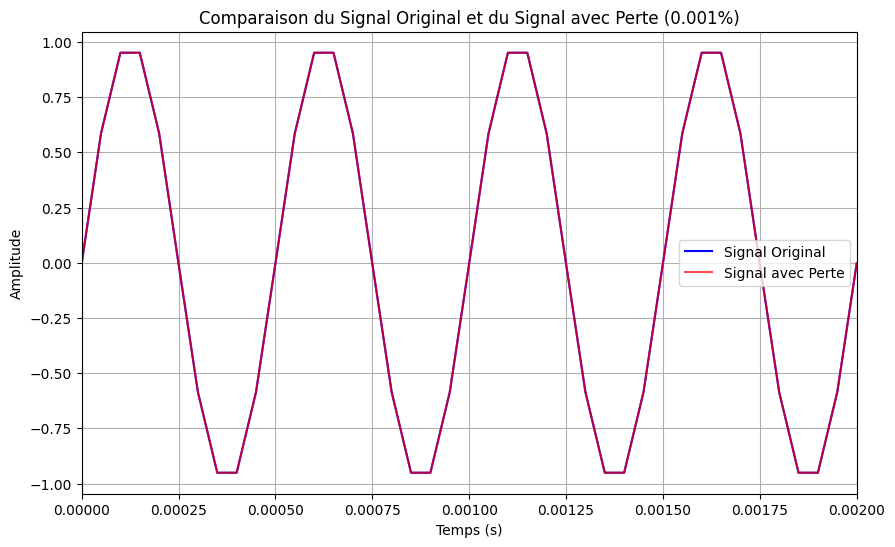

Test avec une probabilité de perte de 0.01 %.
Nombre de paquets : 30000
Nombre de pertes : 296


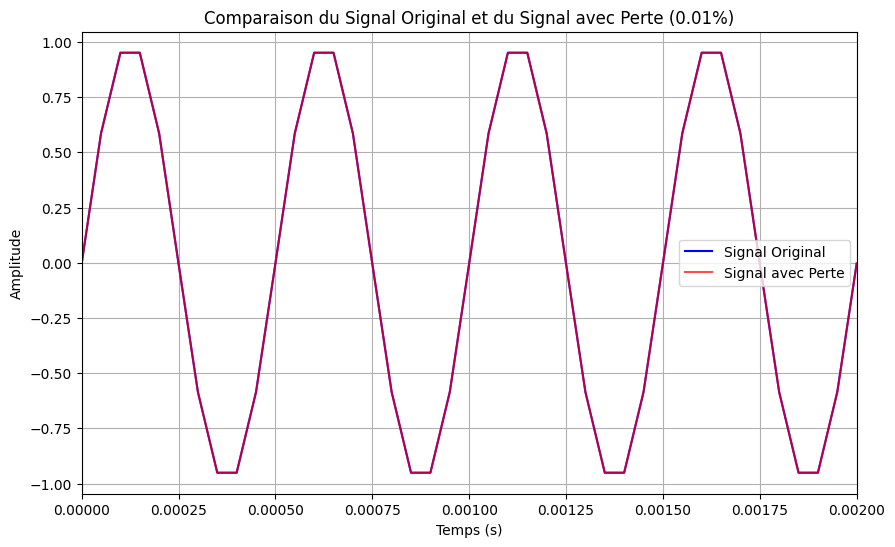

Test avec une probabilité de perte de 0.1 %.
Nombre de paquets : 30000
Nombre de pertes : 3017


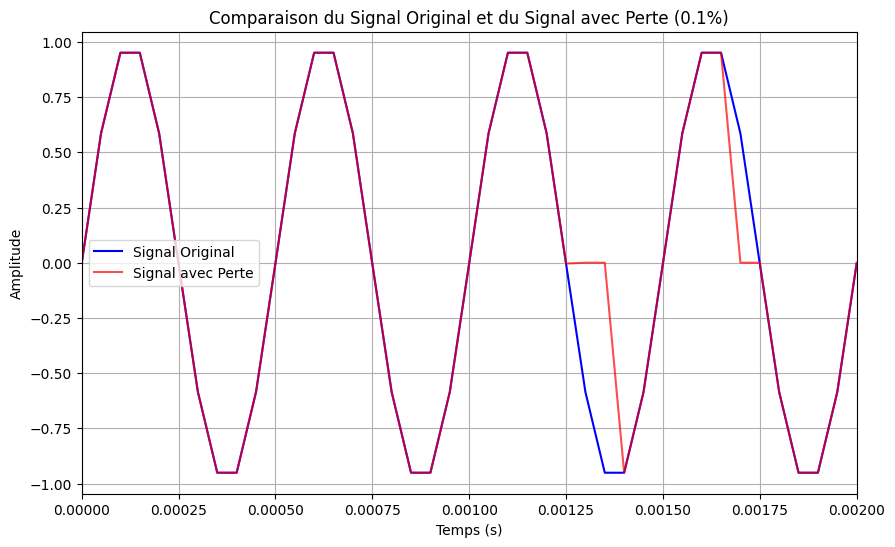

In [47]:
import numpy as np
import pyaudio
from scipy.io.wavfile import read

# Paramètres de création du signal
f = 2000  # fréquence de la tonalité (Hz)
duree = 3  # durée du signal (s)
ech_periode = 10  # échantillons par période
fs = f * ech_periode  # fréquence d'échantillonnage

# Création du signal
t = np.linspace(0, duree, int(fs * duree), endpoint=False)
signal = np.sin(2 * np.pi * f * t)

#Nombre de bits/éch.
bits = 8
signal = quantifier(signal, bits)
print('len==',signal.shape)
# Paramètres de la simulation
taille_paquet = 2  # taille du paquet en octets

# Fonction pour compter le nombre de paquets
def nombre_paquets(signal, taille_paquet):
    nb = 0
    for i in range(0, len(signal), taille_paquet):
        nb += 1
    print("Nombre de paquets :", nb)

def perte_paquets(signal, taille_paquet,probabilite_perte):
    nb = 0
    signal_perte = np.array([])
    for i in range(0, len(signal), taille_paquet):
        if np.random.rand() < probabilite_perte:
            signal_perte = np.append(signal_perte, [0,0])
            nb += 1
        else:
            signal_perte = np.append(signal_perte, signal[i:i+taille_paquet])
    print("Nombre de pertes :", nb)
    return signal_perte

#Fonction pour simuler l'envoi de paquets avec latence
def envoyer_paquets(signal_bytes, taille_paquet,probabilite_perte,signal_perte):
    nb = 0
    for i in range(0, len(signal_bytes), taille_paquet):
        if np.random.rand() > probabilite_perte :
            signal_perte.extend(signal_bytes[i:i+taille_paquet])
        else:
            print("ko",signal[i:i+taille_paquet])
            signal_perte.extend([0, 0])
            nb += 1
    print("Nombre de perte",nb)
    
def save_modified_audio(signal, fs, output_filename):
    signal = np.nan_to_num(signal)
    signal = np.int16((signal + 1) * 32767 / 2)
    write(output_filename, fs, signal)

def plot_signal_and_modified_signal(nb_p_plot, signal, signal_perte, fs, probabilite_perte):
    temps = np.linspace(0, len(signal) / fs, len(signal))
    temps_perte = np.linspace(0, len(signal_perte) / fs, len(signal_perte))

    plt.figure(figsize=(10, 6))
    plt.plot(temps, signal, label='Signal Original', color='blue')
    plt.plot(temps_perte, signal_perte, label='Signal avec Perte', color='red', alpha=0.7)
    plt.xlim(0, nb_p_plot * periode)  # Limiter l'axe des x à 3 périodes
    plt.xlabel('Temps (s)')
    plt.ylabel('Amplitude')
    plt.title(f'Comparaison du Signal Original et du Signal avec Perte ({probabilite_perte}%)')
    plt.legend()
    plt.grid(True)
    plt.show()

    
# Tester avec différentes probabilités de perte
for probabilite_perte in [0.001, 0.01, 0.1]:
    print(f"Test avec une probabilité de perte de {probabilite_perte} %.")
    nombre_paquets(signal, taille_paquet)
    signal_perte = perte_paquets(signal, taille_paquet,probabilite_perte)
    plot_signal_and_modified_signal(4, signal, signal_perte, fs, probabilite_perte)
    save_modified_audio(signal_perte, fs, f'perte_{probabilite_perte}_signal.wav')
    

L'impact de la perte de paquets dépend de la probabilité p. Avec une faible probabilité, la perte peut être à peine perceptible, mais avec une probabilité plus élevée, il peut y avoir des interruptions notables et une dégradation de la qualité audio.
A titre informatif, la perception de la perte de paquets peut varier en fonction du contenu du signal. Par exemple, la perte dans un signal de parole peut être plus perceptible dans les consonnes que dans les voyelles.

## Analyse du PCM - DPCM - Partie 2

### 2.1 Etude de l'impacte de la latence sur un codeur du toe DPCM simple avec une résolution R (bits/éch).

Premierement, nous allons mettre en place un siganl